<a href="https://colab.research.google.com/github/gegrabois/ElectionStudy/blob/main/Election_Survey_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file (make sure it's uploaded to Colab)
df = pd.read_csv("TrumpOrBiden.csv")

In [ ]:
df.head()
vote_data=df

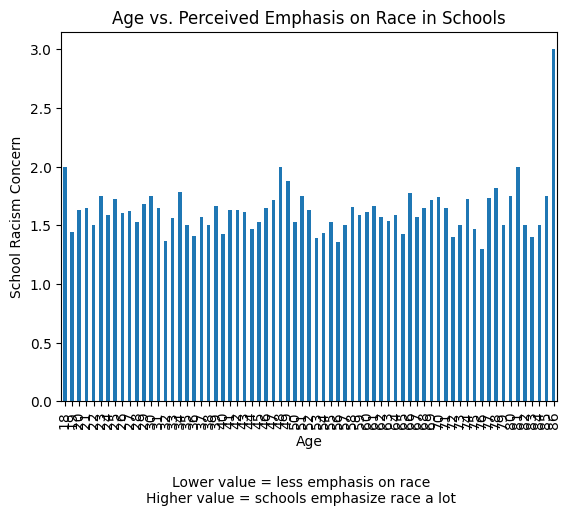

In [26]:

vote_data.groupby("age")["racism_num"].mean().plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("School Racism Concern")
plt.title("Age vs. Perceived Emphasis on Race in Schools")
plt.figtext(0.5, -0.1, "Lower value = less emphasis on race\nHigher value = schools emphasize race a lot", ha="center")
plt.xticks(rotation=90)
plt.show()


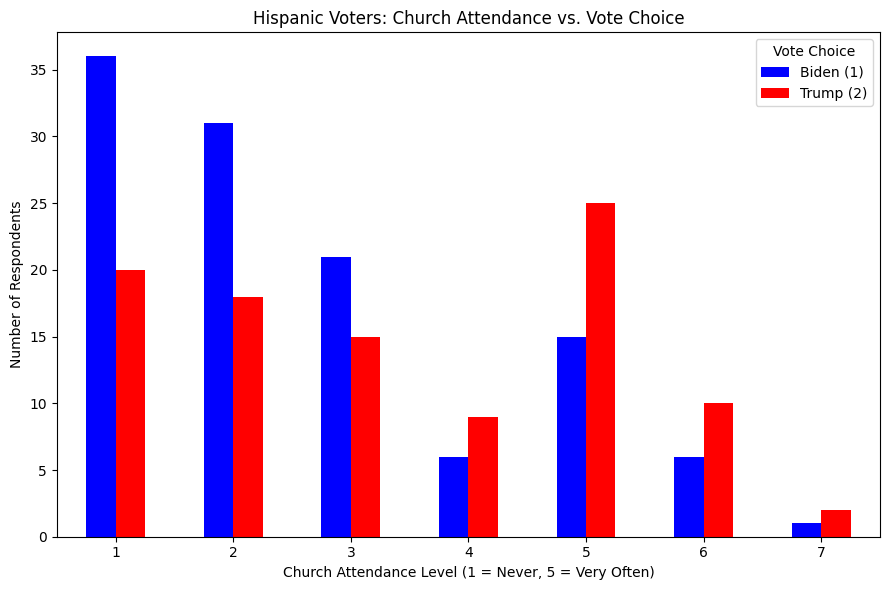

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter Hispanic respondents
hispanic = df[df['race_num'] == 2]

# Group by church attendance and vote choice
grouped = hispanic.groupby(['Chuch_num', 'vchoice_num']).size().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', figsize=(9, 6), color=['blue', 'red'])

# Labels and formatting
plt.title("Hispanic Voters: Church Attendance vs. Vote Choice")
plt.xlabel("Church Attendance Level (1 = Never, 5 = Very Often)")
plt.ylabel("Number of Respondents")
plt.legend(['Biden (1)', 'Trump (2)'], title="Vote Choice")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


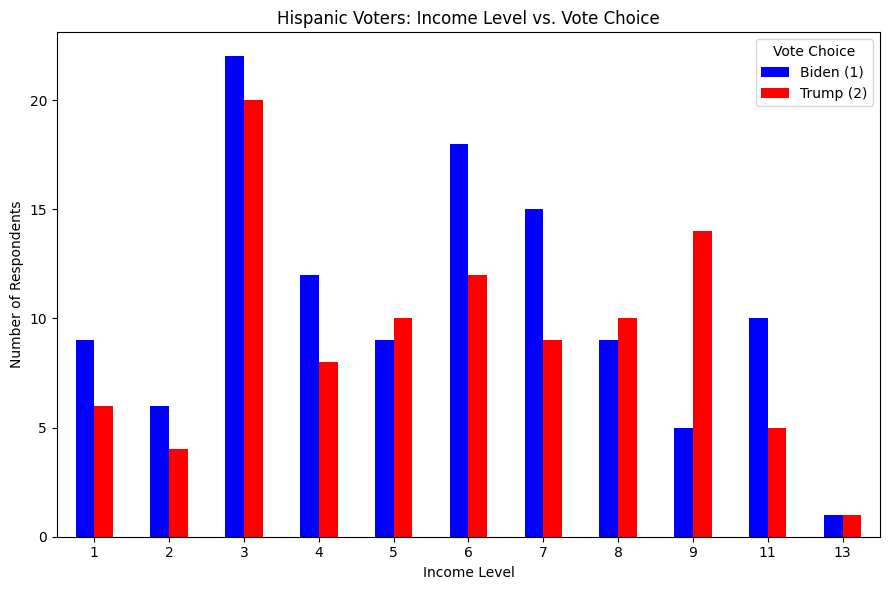

In [ ]:
# Filter Hispanic voters
hispanic = df[df['race_num'] == 2]

# Group by income level and vote choice
grouped_income = hispanic.groupby(['incom_num', 'vchoice_num']).size().unstack(fill_value=0)

# Plot
grouped_income.plot(kind='bar', figsize=(9, 6), color=['blue', 'red'])
plt.title("Hispanic Voters: Income Level vs. Vote Choice")
plt.xlabel("Income Level")
plt.ylabel("Number of Respondents")
plt.legend(['Biden (1)', 'Trump (2)'], title="Vote Choice")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


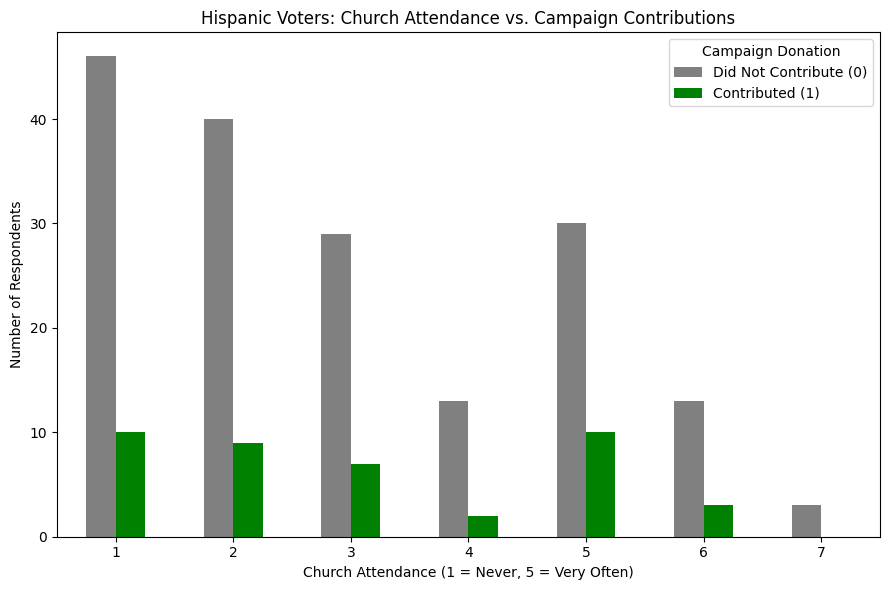

In [ ]:
# Group by church attendance and whether they contributed
grouped_church_hispanic = hispanic.groupby(['Chuch_num', 'Contribute_num']).size().unstack(fill_value=0)

# Plot
grouped_church_hispanic.plot(kind='bar', figsize=(9, 6), color=['gray', 'green'])
plt.title("Hispanic Voters: Church Attendance vs. Campaign Contributions")
plt.xlabel("Church Attendance (1 = Never, 5 = Very Often)")
plt.ylabel("Number of Respondents")
plt.legend(['Did Not Contribute (0)', 'Contributed (1)'], title="Campaign Donation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

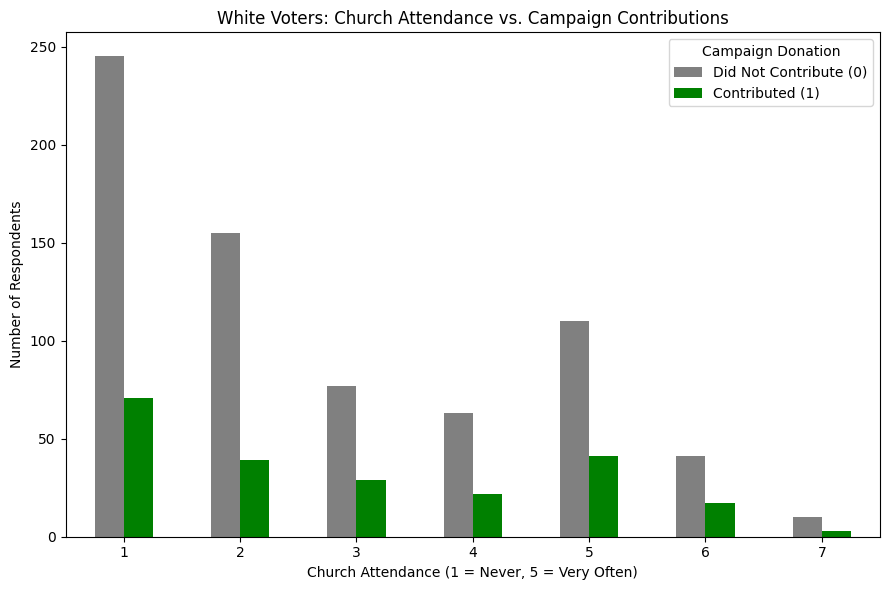

In [ ]:
# Filter White respondents
white = df[df['race_num'] == 3]

# Group by church and contribution
grouped_church_white = white.groupby(['Chuch_num', 'Contribute_num']).size().unstack(fill_value=0)

# Plot
grouped_church_white.plot(kind='bar', figsize=(9, 6), color=['gray', 'green'])
plt.title("White Voters: Church Attendance vs. Campaign Contributions")
plt.xlabel("Church Attendance (1 = Never, 5 = Very Often)")
plt.ylabel("Number of Respondents")
plt.legend(['Did Not Contribute (0)', 'Contributed (1)'], title="Campaign Donation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

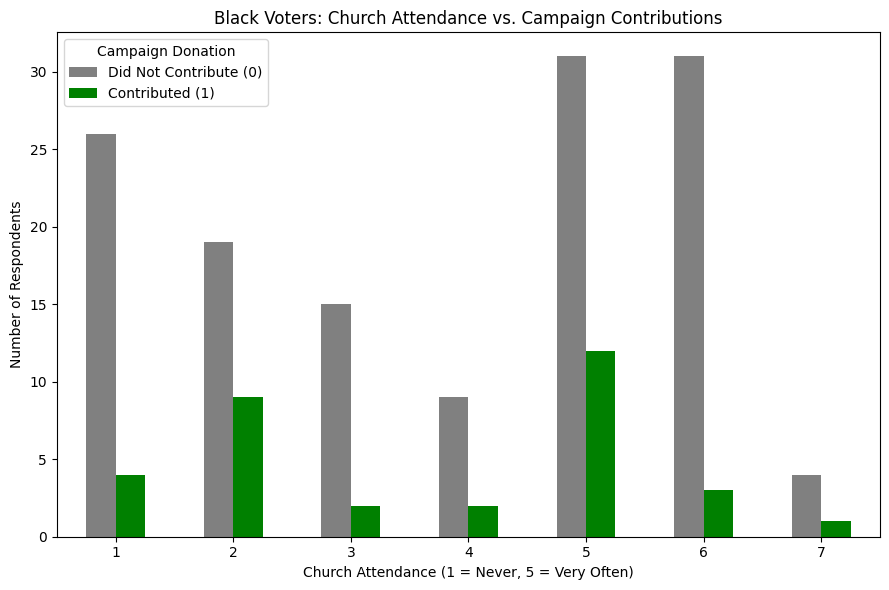

In [ ]:
# Filter Black respondents
black = df[df['race_num'] == 1]

# Group by church and contribution
grouped_church_black = black.groupby(['Chuch_num', 'Contribute_num']).size().unstack(fill_value=0)

# Plot
grouped_church_black.plot(kind='bar', figsize=(9, 6), color=['gray', 'green'])
plt.title("Black Voters: Church Attendance vs. Campaign Contributions")
plt.xlabel("Church Attendance (1 = Never, 5 = Very Often)")
plt.ylabel("Number of Respondents")
plt.legend(['Did Not Contribute (0)', 'Contributed (1)'], title="Campaign Donation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

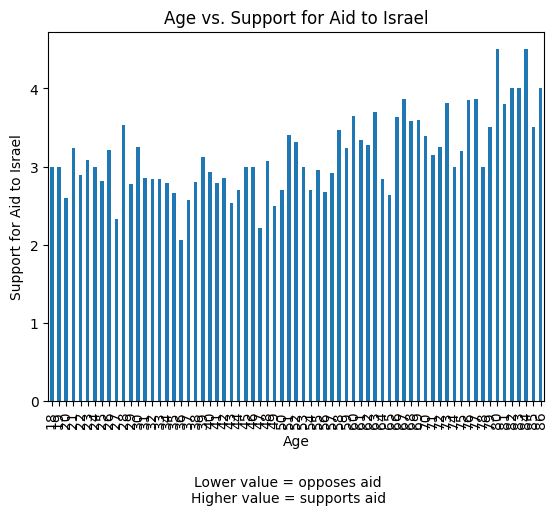

In [ ]:
vote_data.groupby("age")["isreal_num"].mean().plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Support for Aid to Israel")
plt.title("Age vs. Support for Aid to Israel")
plt.figtext(0.5, -0.1, "Lower value = opposes aid\nHigher value = supports aid", ha="center")
plt.show()

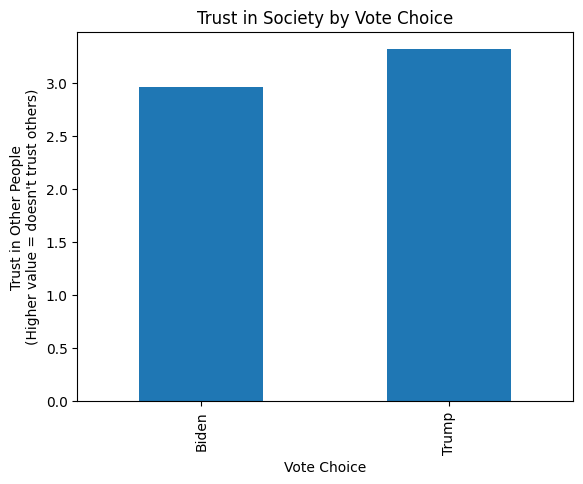

In [ ]:
vote_data.groupby("vchoice_num")["trust_num"].mean().plot(kind="bar")
plt.xticks([0, 1], ["Biden", "Trump"])
plt.xlabel("Vote Choice")
plt.ylabel("Trust in Other People\n(Higher value = doesn't trust others)")
plt.title("Trust in Society by Vote Choice")
plt.show()


Accuracy: 0.7947932618683001

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       640
           2       0.79      0.81      0.80       666

    accuracy                           0.79      1306
   macro avg       0.79      0.79      0.79      1306
weighted avg       0.79      0.79      0.79      1306


Top Predictive Features:
           Feature  Coefficient
2         race_num     0.584378
11   schoolgen_num     0.571485
15      isreal_num     0.489230
12       trust_num     0.274251
13      border_num     0.207731
10      racism_num     0.154361
8      secular_num     0.154361
9        Chuch_num     0.074088
4        incom_num     0.041883
5       employ_num     0.022890
0              age     0.000012
3   Contribute_num    -0.019894
7         lies_num    -0.063429
16  aid_palest_num    -0.305092
6        Abort_num    -0.372001
1       gender_num    -0.426331
14     ukraine_num    -0.665298


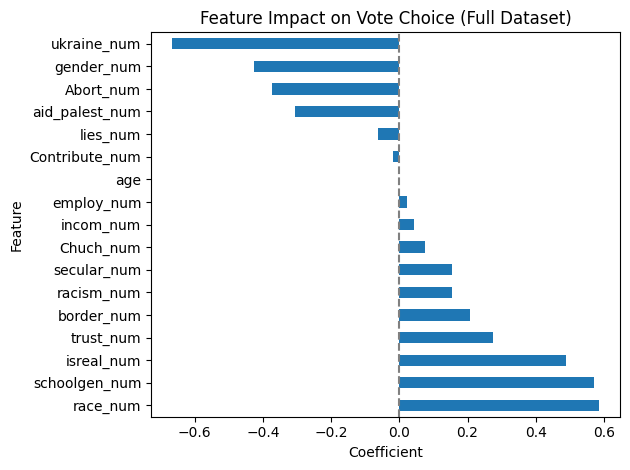

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define your features and target variable
features = [
    'age',
    'gender_num',
    'race_num',
    'Contribute_num',
    'incom_num',
    'employ_num',
    'Abort_num',
    'lies_num',
    'secular_num',
    'Chuch_num',
    'racism_num',
    'schoolgen_num',
    'trust_num',
    'border_num',
    'ukraine_num',
    'isreal_num',
    'aid_palest_num'
]

target = 'vchoice_num'

# Create X and y
X = vote_data[features]
y = vote_data[target]

# Train model on all data
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Predict on the same data
y_pred = model.predict(X)

# Evaluate
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Predictive Features:")
print(coef_df)

# Optional: Plot feature importance
import matplotlib.pyplot as plt

coef_df.set_index('Feature').plot(kind='barh', legend=False)
plt.title('Feature Impact on Vote Choice (Full Dataset)')
plt.xlabel('Coefficient')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
new_person = pd.DataFrame([[
    35,    # age
    1,     # gender_num (Male)
    3,     # race_num (White)
    1,     # Contribute_num (Donated to campaign)
    11,    # incom_num (middle/high income)
    1,     # employ_num (Full time)
    4,     # Abort_num (Very supportive of abortion rights)
    4,     # lies_num (Rarely lies)
    1,     # secular_num (Very secular)
    5,     # Chuch_num (Goes to church often)
    4,     # racism_num (Believes schools emphasize race a lot)
    5,     # schoolgen_num (Believes schools emphasize gender a lot)
    5,     # trust_num (Doesn’t trust others)
    5,     # border_num (Wants stricter border policy)
    2,     # ukraine_num (Somewhat supports aid to Ukraine)
    2,     # isreal_num (Somewhat supports aid to Israel)
    5      # aid_palest_num (Strongly opposes aid to Palestine)
]], columns=features)

# Show the test case
print("To display this model at work. We added an imaginary person to the dataframe. This person is a 35 year old white male who donated to a campaign, has an income of $100,000-120,000, He is a full time employee who is supportive of aborition rights, doesn't think that he lies very much, goes to church regularly. He also believes that school put a lot of emphasis on race and sexuality. He doesn't trust others and wants a stricter border. He supports Aid to Isreal and Ukraine and is against Aid to Palestine. This man has a large combination of the influetial factors that affect if someone will vote for Trump or Biden. Lets see how the Model predicts how he will vote:")
display(new_person)

# Predict
new_prediction = model.predict(new_person)[0]

# Interpret
print("Prediction:", "Biden" if new_prediction == 1 else "Trump")

To display this model at work. We added an imaginary person to the dataframe. This person is a 35 year old white male who donated to a campaign, has an income of $100,000-120,000, He is a full time employee who is supportive of aborition rights, doesn't think that he lies very much, goes to church regularly. He also believes that school put a lot of emphasis on race and sexuality. He doesn't trust others and wants a stricter border. He supports Aid to Isreal and Ukraine and is against Aid to Palestine. This man has a large combination of the influetial factors that affect if someone will vote for Trump or Biden. Lets see how the Model predicts how he will vote:


,age,gender_num,race_num,Contribute_num,incom_num,employ_num,Abort_num,lies_num,secular_num,Chuch_num,racism_num,schoolgen_num,trust_num,border_num,ukraine_num,isreal_num,aid_palest_num
0,35,1,3,1,11,1,4,4,1,5,4,5,5,5,2,2,5


Prediction: Trump


Total high-income individuals (income 11 or 13): 122


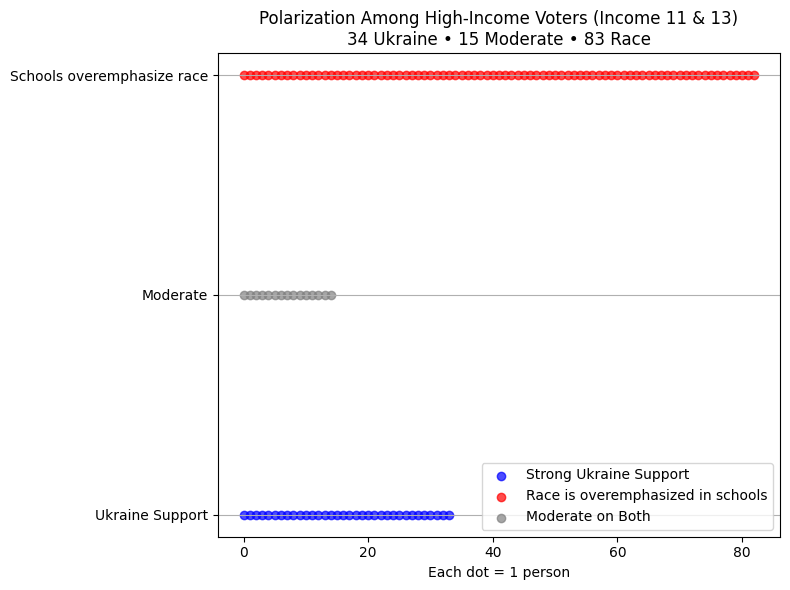

In [27]:
import matplotlib.pyplot as plt

# Filter to high-income respondents (income 11 or 13)
print("Total high-income individuals (income 11 or 13):", len(high_income))

high_income = vote_data[vote_data['incom_num'].isin([11, 13])]

# Define clusters
cluster_ukraine = high_income[high_income['ukraine_num'].isin([1, 2])]
cluster_gender = high_income[high_income['schoolgen_num'].isin([4, 5])]
cluster_middle = high_income[
    (high_income['ukraine_num'].isin([3])) &
    (high_income['race_num'].isin([3]))
]

# Plot setup
plt.figure(figsize=(8, 6))

# Cluster 1: Strong Ukraine Support
plt.scatter(range(len(cluster_ukraine)), [1]*len(cluster_ukraine),
            color='blue', label='Strong Ukraine Support', alpha=0.7)

# Cluster 2: School Gender Emphasis Concern
plt.scatter(range(len(cluster_gender)), [2]*len(cluster_gender),
            color='red', label='Race is overemphasized in schools', alpha=0.7)

# Cluster 3: Middle on Both Issues
plt.scatter(range(len(cluster_middle)), [1.5]*len(cluster_middle),
            color='gray', label='Moderate on Both', alpha=0.7)

# Format the plot
plt.yticks([1, 1.5, 2], ['Ukraine Support', 'Moderate', 'Schools overemphasize race'])
plt.title(f"Polarization Among High-Income Voters (Income 11 & 13)\n{len(cluster_ukraine)} Ukraine • {len(cluster_middle)} Moderate • {len(cluster_gender)} Race")
plt.xlabel("Each dot = 1 person")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


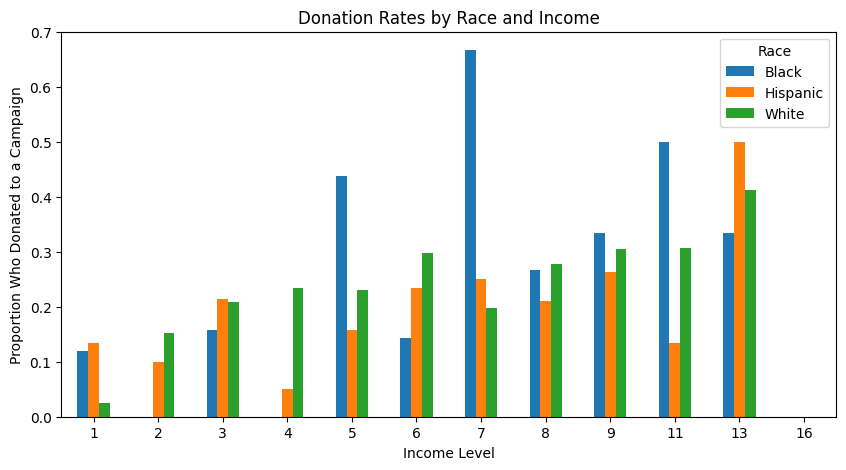

In [ ]:
# Group by race and income, then get % who donated
donation_by_race_income = vote_data.groupby(["race_num", "incom_num"])["Contribute_num"].mean().unstack()

# Plot as heatmap-style bar chart
donation_by_race_income.T.plot(kind="bar", figsize=(10,5))
plt.title("Donation Rates by Race and Income")
plt.xlabel("Income Level")
plt.ylabel("Proportion Who Donated to a Campaign")
plt.legend(title="Race", labels=["Black", "Hispanic", "White"])
plt.xticks(rotation=0)
plt.show()
